In [1]:
import os
import numpy as np
import glob
import json
import matplotlib.pyplot as plt
import gc
import pandas as pd
from baseband_analysis.analysis.toa import get_TOA
from baseband_analysis.core import BBData
from chime_frb_api import frb_master
import datetime as dt
from astropy.time import Time
gc.collect()

--------------------------------------------------------------------------
[[19897,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: 1bae6bb3b670

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------


19

In [6]:
#### Event Ids #####
basepath = '/data/user-data/ksand/R3/fitburst_run_final/'
entries = os.listdir(basepath)
entries.remove('.ipynb_checkpoints')
entries = np.array(entries).astype(int)
entries = np.sort(entries)
print(entries)

[ 23789294  23891929  40363753  40750224  40750656  60073678  65395717
  65511496  67522832  67522901  69509443  71665813  71784400  71784833
  71785167  73726599  83984528  84081108  92773515  92844954 135577833
 151677988 153859596 154910364 154913824 155079679 163181014 163362088
 163534005 166812476 171681248 171855709 175004577 175929272 176060009
 180666196 180667327 188553320 194488374 194488393 194488454 195132396
 200973875 203798724 203935225]


In [7]:
##### Loading Data #######
basepath = '/data/user-data/ksand/R3/fitburst_run_final/'
event_ids = []
pm_files = []
result_files = []
input_files = []
summary = []
for event in entries:
    if (event != '.ipynb_checkpoints'): 
        path_to_event = os.path.join(basepath, str(event))
        trials = np.array(os.listdir(path_to_event))
#         print(event, len(trials))
        count = 0


        for trial in trials:
            if (trial != '.ipynb_checkpoints'):
                path_to_file = os.path.join(path_to_event, trial)
                #print(event, path_to_file, "\n")
                #print(path_to_file)
                event_ids.append(int(event))
                np.array(pm_files.append(glob.glob(path_to_file + '/pm*.npz')))
                #print(pm_files)
                np.array(result_files.append(glob.glob(path_to_file + '/result*.npz')))
                np.array(input_files.append(glob.glob(path_to_file + '/R3*.npz')))
                np.array(summary.append(glob.glob(path_to_file + '/summary*.png')))
                count = count + 1
        #print(event, count)
#         print("\n")



    # for input_file in input_files:
    #     data_input = np.load(input_file[0], allow_pickle = True)
    #     plt.imshow(data_input["data_full"])
    #     plt.show()


        

# for result_file in result_files:
#     data_result = np.load(result_file[0], allow_pickle = True)
#     #print(data_result['arr_0'][0])
    


In [8]:
### Getting DM and Downsample ####
DMs = []
downsamps = []
for pm_file in pm_files:
    if len(pm_file) > 0:
        data_pm = np.load(pm_file[0], allow_pickle = True)
        dm = data_pm['arr_0'].item(0)['DM']
        ds = data_pm['arr_0'].item(0)['ds']
        DMs.append(float(dm))
        downsamps.append(int(ds))


In [9]:
scatterings = []
widths = []
sc_error = []
width_err = []
dm_offset = []
dm_offset_err = []
event_id_neg = []
print(len(result_files))
for result_file in result_files:
    #print(result_file)
    if len(result_file) > 0:
        data_result = np.load(result_file[0], allow_pickle = True)
        print(result_file)
        print(data_result['arr_0'])
        scatterings.append(float(data_result['arr_0'][0]['scattering_timescale'][0]))
        if (data_result['arr_0'][0]['scattering_timescale'][0]) < 0:
            print(result_file[0])
        widths.append(data_result['arr_0'][0]['burst_width'][:].astype(float))
        dm_offset.append(float(data_result['arr_0'][0]['dm'][0]))
        try:
            width_err.append(data_result['arr_0'][1]['burst_width'][:].astype(float))
            sc_error.append(float(data_result['arr_0'][1]['scattering_timescale'][0]))
            dm_offset_err.append(float(data_result['arr_0'][1]['dm'][0]))
        except:
            width_err.append(float('0'))
            sc_error.append(float('0'))
            dm_offset_err.append(float('0'))
        #width = data_result['arr_0'][0]['burst_width']
print(scatterings, "\n")
print(widths, "\n")
print(dm_offset,"\n")
print(width_err,"\n")
print(sc_error,"\n")
print(dm_offset_err)

45
['/data/user-data/ksand/R3/fitburst_run_final/23789294/Trial1_20221028/result_R3_23789294_30+66_DM_348.732_dsamp_32.npz']
[{'dm': [0.07979282854727729], 'scattering_timescale': [0.0008018631534336364], 'amplitude': array([-8.66013925, -8.66970618]), 'arrival_time': array([0.00788829, 0.01212998]), 'burst_width': array([0.00019754, 0.00043446]), 'spectral_index': array([105.62618818,  88.78174679]), 'spectral_running': array([-195.01931526, -140.15400379])}
 {'dm': [0.010439371867463765], 'scattering_timescale': [3.37196686964182e-05], 'amplitude': array([0.30303696, 0.48429078]), 'arrival_time': array([8.46535107e-05, 1.07471099e-04]), 'burst_width': array([2.40420586e-05, 5.89433819e-05]), 'spectral_index': array([5.31462116, 7.39628661]), 'spectral_running': array([10.02435983, 12.18262571])}
 array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.15102558e-02, 1.12710026e-02, 1.10367225e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

['/data/user-data/ksand/R3/fitburst_run_final/69509443/Trial1_20221028/result_R3_69509443_DM_348.98_dsamp_128.npz']
[{'dm': [-0.09730130656966929], 'scattering_timescale': [0.002209394705177386], 'amplitude': array([-2.58381989, -2.60176258]), 'arrival_time': array([0.01396681, 0.01693027]), 'burst_width': array([0.0012949 , 0.00010538]), 'spectral_index': array([-1.57891897,  4.09257487]), 'spectral_running': array([ -69.77117713, -114.37991558])}
 {'dm': [0.0263137025501831], 'scattering_timescale': [0.00013502776227597337], 'amplitude': array([0.03233897, 0.02909163]), 'arrival_time': array([1.3476250e-04, 2.8005028e-05]), 'burst_width': array([1.59049946e-04, 3.73627635e-05]), 'spectral_index': array([0.87279474, 0.93396828]), 'spectral_running': array([ 8.50305529, 12.8565775 ])}
 array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.17527666e-07, 2.11127228e-07, 2.04915115e-07],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.29440448e-0

[{'dm': [-0.01098365730083046], 'scattering_timescale': [0.000498632506677236], 'amplitude': array([-2.88176466, -2.93911037, -3.77404135]), 'arrival_time': array([0.00811021, 0.01027414, 0.01543284]), 'burst_width': array([7.79473270e-05, 2.01422486e-03, 1.05753817e-03]), 'spectral_index': array([-1.05718004, -2.13217765, 27.61334989]), 'spectral_running': array([-216.50609818, -118.80500418, -120.8135961 ])}
 {'dm': [0.0038332996639536], 'scattering_timescale': [2.4447916788514646e-06], 'amplitude': array([0.00881206, 0.02081141, 0.08916737]), 'arrival_time': array([4.23035296e-06, 3.30421085e-05, 7.67260642e-05]), 'burst_width': array([5.46600379e-06, 6.32878910e-06, 8.54007717e-05]), 'spectral_index': array([0.53857353, 0.95520598, 3.491204  ]), 'spectral_running': array([ 9.76809359, 12.54456331, 14.94828737])}
 array([[1.62724813e-16, 1.80816277e-16, 2.00837896e-16, ...,
         3.49673260e-07, 3.44003070e-07, 3.38424826e-07],
        [1.79388249e-16, 1.99333092e-16, 2.21405905e

['/data/user-data/ksand/R3/fitburst_run_final/171855709/Trial1_20221102/result_R3_171855709_DM_348.95_dsamp_128.npz']
[{'dm': [0.13696019937493076], 'scattering_timescale': [0.0004607573310920117], 'amplitude': array([-11.30179815]), 'arrival_time': array([0.00727556]), 'burst_width': array([0.00137777]), 'spectral_index': array([119.96029587]), 'spectral_running': array([-173.6749165])}
 {'dm': [0.04997842076537935], 'scattering_timescale': [7.77690055344065e-05], 'amplitude': array([0.93147215]), 'arrival_time': array([0.00056339]), 'burst_width': array([0.0001351]), 'spectral_index': array([12.98594469]), 'spectral_running': array([19.52692045])}
 array([[1.08715876e-11, 5.49903360e-11, 2.62747927e-10, ...,
         5.07435887e-03, 4.39667232e-03, 3.80949161e-03],
        [1.15130949e-11, 5.81741640e-11, 2.77631480e-10, ...,
         5.07449514e-03, 4.39432902e-03, 3.80532979e-03],
        [1.21884760e-11, 6.15161399e-11, 2.93222597e-10, ...,
         5.07249130e-03, 4.39012754e-03,

['/data/user-data/ksand/R3/fitburst_run_final/194488454/Trial1_20221029/result_R3_194488454_DM_348.862_dsamp_4.npz']
[{'dm': [0.0054867850901088025], 'scattering_timescale': [0.0004153979600006881], 'amplitude': array([-4.39966961, -5.39273529]), 'arrival_time': array([0.00357255, 0.005123  ]), 'burst_width': array([3.78426412e-04, 8.73476928e-05]), 'spectral_index': array([43.70929171, 51.97246998]), 'spectral_running': array([-151.23910138, -133.56479114])}
 {'dm': [0.0047485679694228644], 'scattering_timescale': [1.5521068191368977e-05], 'amplitude': array([0.05905064, 0.11822306]), 'arrival_time': array([2.32595773e-05, 2.52814890e-05]), 'burst_width': array([1.69284829e-05, 1.12814575e-05]), 'spectral_index': array([1.94111813, 2.88979601]), 'spectral_running': array([6.77512577, 7.508998  ])}
 array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.36901918e-04, 1.36232269e-04, 1.35565895e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        

[array([0.00019754, 0.00043446]), array([0.0001652 , 0.00018599]), array([0.00104376, 0.00087314, 0.00149603, 0.00099575]), array([0.00221424]), array([4.39584020e-03, 1.38754355e-04, 2.62255711e-04, 6.84351834e-07,
       1.56804250e-03, 6.11724911e-04]), array([0.00286337]), array([0.00453753, 0.0009242 ]), array([0.00247613]), array([0.001058]), array([0.00058562, 0.00137229]), array([0.0012949 , 0.00010538]), array([0.00104536]), array([0.00271838, 0.00214261]), array([0.00137209]), array([0.00016915]), array([0.00401867]), array([0.00030574, 0.00265097]), array([0.00183448]), array([0.00137612]), array([7.79473270e-05, 2.01422486e-03, 1.05753817e-03]), array([0.00348217, 0.00511547]), array([0.00176262]), array([0.00041749, 0.00019325]), array([0.0021192]), array([0.0006721 , 0.00054339, 0.00226777]), array([0.00166871]), array([0.00178257]), array([0.00255664]), array([0.00090752]), array([0.00142966]), array([0.00156359]), array([0.00137777]), array([0.00187204]), array([0.00178

In [8]:
### Drift rate ######
drift_rate = []
event_id = []
drift_rate_err = []
file  = []
for i in range(len(entries)):
    event = entries[i]
    resultpath = '/data/user-data/ksand/R3/Drift_rate/'
    path_to_file = os.path.join(resultpath, str(event))
    #if os.path.exists(path_to_file):
        #print(path_to_file)        
    #print("\n",path_to_file)
    fname = glob.glob(path_to_file + '/ac_drift_rates_result*.npz')
    #print(fname)
    #print(fname)
    if len(fname)==0:
        #print("File name empty for event", entries[i])
        #print(fname)
        event_id.append(int(entries[i]))
        #print("No npz file was generated")
        drate = 0
        drate_err = 0
        drift_rate.append(drate)
        drift_rate_err.append(drate_err)

    #print("For event ", event ,"\n")
    else:
        for f in fname:
            downsamp = (f.split('_')[6]).split('.')[0]
            #print("\nResult for downsample", downsamp)
            event_id.append(int(entries[i]))
            data_drift = np.load(f)
            drate = data_drift['drift_rate']
            drate_err = data_drift['drfit_rate_high']
            if (drate > 0) or (drate < -30):
                drate = 0
                drate_err = 0
            drift_rate.append(float(drate))
            drift_rate_err.append(float(drate_err))
        
#         for k in data_drift.items():
#             print(k)
# print(event_id)
# print(drift_rate)
# print(drift_rate_err)
# print(len(file))
R3_df_drift_rate = pd.DataFrame(list(zip(event_id, drift_rate, drift_rate_err))
                     ,columns =['Event_id', 'Drift_rate', 'Drift_rate_err'])
R3_df_drift_rate = R3_df_drift_rate.sort_values(['Event_id'])
R3_df_drift_rate = R3_df_drift_rate.drop_duplicates(subset='Event_id')
print(R3_df_drift_rate)

e_drift = R3_df_drift_rate['Event_id'].to_numpy()
driftnp = R3_df_drift_rate['Drift_rate'].to_numpy()
driftnpe = R3_df_drift_rate['Drift_rate_err'].to_numpy()
print(e_drift, driftnp, driftnpe)

     Event_id  Drift_rate  Drift_rate_err
31   23789294    0.000000        0.000000
0    23891929  -22.883714       23.519985
12   40363753    0.000000        0.000000
7    40750224    0.000000        0.000000
26   60073678    0.000000        0.000000
5    65395717    0.000000        0.000000
32   67522832    0.000000        0.000000
16   67522901   -0.141496        0.001273
41   69509443    0.000000        0.000000
29   71665813    0.000000        0.000000
10   71784400    0.000000        0.000000
3    71784833  -15.598474        0.214607
24   71785167    0.000000        0.000000
23   73726599   -2.700393        0.019043
30   83984528    0.000000        0.000000
15   84081108    0.000000        0.000000
2    92773515    0.000000        0.000000
27   92844954    0.000000        0.000000
28  151677988    0.000000        0.000000
33  153859596    0.000000        0.000000
4   154910364  -25.234803        0.121836
34  154913824    0.000000        0.000000
21  155079679    0.000000        0

In [8]:
##### Frequency and Bandwidth ######
centers = []
peaks = []
uppers = []
lowers = []
bws = []
for result_file in result_files:
    #print(result_file)
    if len(result_file) > 0:
        data_result = np.load(result_file[0], allow_pickle = True)
        try:
            model = data_result['arr_0'][2] ##load the fitburst model
        except:
            model = data_result['arr_0'][1]
        y = np.sum(model, axis=1)
        y_lim = np.max(y)/10
        freq = np.linspace(400,800,1024)
        low = np.min(np.where(y>y_lim))
        #print(freq[low])
        lowers.append(float(freq[low]))
        high = np.max(np.where(y>y_lim))
        #print(freq[high])
        uppers.append(float(freq[high]))
        center = (freq[low] + freq[high])/2
        centers.append(float(center))
        bw = freq[high]-freq[low]
        #print(center, bw)
        bws.append(float(bw))
        peak = np.argmax(y)
        #print(freq[peak])
        peaks.append(float(freq[peak]))
        
        
#         plt.imshow(model, origin='lower')
#         plt.show()
        
#         plt.plot(freq,y)
#         plt.axvline(freq[low], color = 'r')
#         plt.axvline(freq[high], color = 'b')
#         plt.axvline(freq[peak], color = 'g')
#         plt.axvline(center, color = 'k')
#         plt.show()
#         gc.collect()
# print(peaks, "\n")
# print(bws, "\n")
# print(uppers, "\n")
# print(lowers, "\n")
# print(centers)
R3_df_bw = pd.DataFrame(list(zip(event_ids, peaks, bws, centers, lowers, uppers))
                     ,columns =['Event_id', 'Peak_freq', 'Bandwidth', 'Center_freq', 'Lower', 'Upper'])
R3_df_bw = R3_df_bw.sort_values(['Event_id'])
l = R3_df_bw['Lower'].to_numpy()
h = R3_df_bw['Upper'].to_numpy()
print(l.tolist())
print(h.tolist())
p = R3_df_bw['Peak_freq'].to_numpy()
b = R3_df_bw['Bandwidth'].to_numpy()
c = R3_df_bw['Center_freq'].to_numpy()
print(R3_df_bw)

[400.0, 463.34310850439886, 514.1739980449657, 400.0, 400.0, 400.0, 400.0, 400.0, 611.9257086999022, 410.1661779081134, 507.9178885630498, 635.386119257087, 400.0, 609.5796676441837, 603.3235581622678, 401.9550342130987, 633.4310850439882, 400.0, 400.0, 485.2394916911046, 400.0, 430.8895405669599, 519.2570869990225, 400.0, 455.5229716520039, 400.0, 400.0, 400.0, 400.0, 586.5102639296188, 400.0, 400.0, 400.0, 400.0, 417.9863147605083, 400.0, 400.0, 439.88269794721407, 400.0, 437.53665689149557, 442.6197458455523, 400.0, 400.0, 400.0, 400.0]
[503.2258064516129, 615.44477028348, 754.2521994134897, 600.5865102639297, 533.7243401759531, 495.79667644183775, 616.2267839687195, 468.03519061583575, 779.2766373411534, 586.9012707722385, 709.6774193548388, 796.4809384164223, 473.1182795698925, 791.7888563049853, 766.3734115347019, 560.3128054740957, 800.0, 494.6236559139785, 521.9941348973607, 681.1339198435973, 624.4379276637342, 618.9638318670577, 796.0899315738025, 582.9912023460411, 648.28934

In [19]:
R3_df_pol = pd.DataFrame(list(zip(event_ids, DMs, downsamps, scatterings, widths, width_err, 
                                 sc_error, dm_offset, dm_offset_err, peaks, bws, centers))
                     ,columns =['Event_id', 'DM_struc', 'Downsample', 'Scattering(s)', 'Widths(s)', 
                               'Width_err(s)','Sc_err(s)','dm_offset','dm_offset_err','Peak_freq','Bandwidth','Center_Freq'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
R3_df_pol.apply(pd.to_numeric, errors='ignore')
R3_df_pol = R3_df_pol.sort_values(['Event_id'])
e_main = R3_df_pol['Event_id'].to_numpy()
print(R3_df_pol)

     Event_id    DM_struc  Downsample  Scattering(s)  \
37   23789294  348.732000          32       0.000802   
1    23891929  348.791000          16       0.000564   
13   40363753  348.920000          16       0.000253   
11   40750224  349.890000          64       0.000290   
6    40750656  348.813000          64       0.001546   
30   60073678  348.680000         256       0.000270   
5    65395717  349.110000         256       0.000712   
2    65511496  349.890000         256       0.000137   
36   67522832  349.847000         256       0.002233   
16   67522901  349.097000          64       0.000575   
44   69509443  348.980000         128       0.002209   
32   71665813  349.270000         256       0.000360   
14   71784400  349.370000         128       0.000358   
4    71784833  349.725000         256       0.000596   
27   71785167  348.840000          32       0.000570   
24   73726599  348.730000         128       0.000448   
31   83984528  349.194439          64       0.00

In [16]:
drift_main = np.zeros(len(e_main))
drift_main_err = np.zeros(len(e_main))
for j in range(len(e_drift)):
    print("j", j, e_drift[j])
    for i in range(len(e_main)):
        if e_main[i] == e_drift[j]:
            print("event", e_drift[j])
            drift_main[i] = driftnp[j]
            print("drift", driftnp[j])
            drift_main_err[i] = driftnpe[j]
print(drift_main[66],"\n")
print(drift_main_err)


j 0 151677988
event 151677988
drift 0
j 1 153859596
event 153859596
drift 0
j 2 154910364
event 154910364
drift -25.23480341033768
j 3 154913824
event 154913824
drift 0
j 4 155079679
event 155079679
drift 0
j 5 163181014
event 163181014
drift 0
j 6 163362088
event 163362088
drift 0
j 7 163534005
event 163534005
drift -1.8046143109235677
j 8 166812476
event 166812476
drift 0
j 9 171681248
event 171681248
drift 0
j 10 171855709
event 171855709
drift 0
j 11 175004577
event 175004577
drift 0
j 12 175929272
event 175929272
drift -0.04538996730588525
j 13 176060009
event 176060009
drift 0
j 14 180666196
event 180666196
drift 0
j 15 180667327
event 180667327
drift 0
j 16 188553320
event 188553320
drift 0
j 17 194488374
event 194488374
drift 0
j 18 194488393
event 194488393
drift -4.36090592264019
j 19 194488454
event 194488454
drift -7.552778808402429
j 20 195132396
event 195132396
drift 0
j 21 200973875
event 200973875
drift 0
j 22 203798724
event 203798724
drift 0
j 23 203935225
event 20393

IndexError: index 66 is out of bounds for axis 0 with size 42

In [17]:
R3_df_pol['drift_rate'] = drift_main.tolist()
R3_df_pol['drift_rate_err'] = drift_main_err.tolist()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(R3_df_pol)

     Event_id    DM_struc  Downsample  Scattering(s)  \
28  151677988  348.990000        1024       0.000497   
33  153859596  348.843500         128       0.001518   
4   154910364  348.838000          64       0.001243   
34  154913824  348.688500          32       0.001497   
21  155079679  349.470000        1024       0.000557   
13  163181014  349.542000          64       0.000090   
18  163362088  348.830000         512       0.000853   
20  163534005  348.988000         128       0.000197   
40  166812476  349.600000          16       0.000928   
1   171681248  348.930000         512       0.000820   
35  171855709  348.950000         512       0.000361   
37  175004577  349.781478        1024       0.000302   
38  175929272  349.380000         128       0.001139   
9   176060009  349.220000          16       0.000299   
39  180666196  348.731000         512       0.000635   
36  180667327  349.062000         256       0.000154   
14  188553320  349.790000         256       0.00

In [18]:
centers = []
peaks = []
uppers = []
lowers = []
bws = []
for result_file in result_files:
    #print(result_file)
    if len(result_file) > 0:
        data_result = np.load(result_file[0], allow_pickle = True)
        try:
            model = data_result['arr_0'][2] ##load the fitburst model
        except:
            model = data_result['arr_0'][1]
        y = np.sum(model, axis=1)
        y_lim = np.max(y)/10
        freq = np.linspace(400,800,1024)
        low = np.min(np.where(y>y_lim))
        #print(freq[low])
        lowers.append(freq[low])
        high = np.max(np.where(y>y_lim))
        #print(freq[high])
        uppers.append(freq[high])
        center = (freq[low] + freq[high])/2
        centers.append(center)
        bw = freq[high]-freq[low]
        #print(center, bw)
        bws.append(bw)
        peak = np.argmax(y)
        #print(freq[peak])
        peaks.append(freq[peak])
        
        
#         plt.imshow(model, origin='lower')
#         plt.show()
        
#         plt.plot(freq,y)
#         plt.axvline(freq[low], color = 'r')
#         plt.axvline(freq[high], color = 'b')
#         plt.axvline(freq[peak], color = 'g')
#         plt.axvline(center, color = 'k')
#         plt.show()
#         gc.collect()
print(peaks, "\n")
print(bws, "\n")
print(uppers, "\n")
print(lowers, "\n")
print(centers)
# R3_df_bw = pd.DataFrame(list(zip(event_ids, peaks, bws, centers))
#                      ,columns =['Event_id', 'Peak_freq', 'Bandwidth', 'Center_freq'])
# R3_df_bw = R3_df_bw.sort_values(['Event_id'])
# p = R3_df_bw['Peak_freq'].to_numpy()
# b = R3_df_bw['Bandwidth'].to_numpy()
# c = R3_df_bw['Center_freq'].to_numpy()
# print(R3_df_bw)

[494.6236559139785, 543.8905180840665, 419.5503421309873, 414.85826001955036, 694.8191593352883, 446.13880742913, 458.65102639296185, 479.76539589442814, 473.5092864125122, 411.7302052785924, 466.08015640273703, 489.54056695992176, 509.8729227761486, 665.8846529814272, 415.6402737047898, 432.06256109481916, 523.1671554252199, 432.8445747800587, 424.633431085044, 539.5894428152493, 487.58553274682305, 448.4848484848485, 453.5679374389052, 452.78592375366566, 474.68230694037146, 412.51221896383186, 408.60215053763443, 679.9608993157381, 516.5200391006842, 599.0224828934506, 435.58162267839685, 727.2727272727273, 707.3313782991202, 417.9863147605083, 424.24242424242425, 520.4301075268817, 690.5180840664711, 446.9208211143695, 655.7184750733138, 400.0, 683.4799608993158, 476.24633431085044, 414.85826001955036, 533.7243401759531, 594.7214076246335] 

[214.2717497556207, 152.10166177908116, 68.03519061583575, 121.99413489736071, 182.2091886608016, 216.22678396871947, 133.7243401759531, 209.9

In [19]:
R3_df_pol['Peak_freq'] = p.tolist()
R3_df_pol['Bandwidth'] = b.tolist()
R3_df_pol['Center_freq'] = c.tolist()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(R3_df_pol)

     Event_id    DM_struc  Downsample  Scattering(s)  \
28  151677988  348.990000        1024       0.000497   
33  153859596  348.843500         128       0.001518   
4   154910364  348.838000          64       0.001243   
34  154913824  348.688500          32       0.001497   
21  155079679  349.470000        1024       0.000557   
13  163181014  349.542000          64       0.000090   
18  163362088  348.830000         512       0.000853   
20  163534005  348.988000         128       0.000197   
40  166812476  349.600000          16       0.000928   
1   171681248  348.930000         512       0.000820   
35  171855709  348.950000         512       0.000361   
37  175004577  349.781478        1024       0.000302   
38  175929272  349.380000         128       0.001139   
9   176060009  349.220000          16       0.000299   
39  180666196  348.731000         512       0.000635   
36  180667327  349.062000         256       0.000154   
14  188553320  349.790000         256       0.00

In [30]:
data_arrival = pd.read_csv('R3_data.csv')
events_mjd = data_arrival['Event_id'].to_numpy()
mjds = data_arrival['TOA(400MHz)'].to_numpy()
print(events_mjd, mjds)

[ 40750224  40750224  40750224  40750224  40750224  40363753  40363753
  40363753  71784400  71784400  71784400 203798724  92773515  92773515
  92773515  92773515  92773515  92773515  92773515  23891929  23891929
  23891929  23891929  23891929 195132396 195132396 195132396 195132396
  71784833  71784833  71784833  71784833  65395717  65395717 175004577
 175929272 175929272 175929272 180666196 166812476 166812476 166812476
 151677988 153859596 153859596 171855709  67522901  67522901  67522901
  67522901  67522901 154913824 154913824 154913824 154913824  84081108
  84081108  84081108 180667327 180667327 194488374 176060009 176060009
 176060009  71785167  71785167  71785167  71785167 194488454 194488454
 194488454 171681248 154910364 154910364 154910364 154910364 200973875
 200973875  73726599  73726599  73726599 163362088 163534005 163534005
 163534005 163534005 194488393 194488393 194488393 194488393 194488393
 194488393 155079679  69509443  69509443  69509443  69509443  69509443
  8398

In [31]:
mjd_main = np.zeros(len(e_main)).astype(float)
#drift_main_err = np.zeros(len(e_main))
for j in range(len(events_mjd)):
    #print("j", j, events_mjd[j])
    for i in range(len(e_main)):
        #print(e_main[i])
        if int(e_main[i]) == int(events_mjd[j]):
            print("Inside if")
            print("event", events_mjd[j])
            mjd_main[i] = mjds[j]
            print("mjd", mjds[j])
            #drift_main_err[i] = driftnpe[j]
print(mjd_main)

Inside if
event 40750224
mjd 58639.70561257977
Inside if
event 40750224
mjd 58639.70561286628
Inside if
event 40750224
mjd 58639.705612572056
Inside if
event 40750224
mjd 58639.70561282966
Inside if
event 40750224
mjd 58639.70561258925
Inside if
event 40363753
mjd 58638.71643314554
Inside if
event 40363753
mjd 58638.71643314554
Inside if
event 40363753
mjd 58638.71643314554
Inside if
event 71784400
mjd 58883.03995005655
Inside if
event 71784400
mjd 58883.03995008706
Inside if
event 71784400
mjd 58883.03995015591
Inside if
event 203798724
mjd 59569.16265637999
Inside if
event 92773515
mjd 59013.69287121129
Inside if
event 92773515
mjd 59013.69287125345
Inside if
event 92773515
mjd 59013.69287120394
Inside if
event 92773515
mjd 59013.69287130879
Inside if
event 92773515
mjd 59013.69287121533
Inside if
event 92773515
mjd 59013.69287121129
Inside if
event 92773515
mjd 59013.69287121129
Inside if
event 23891929
mjd 58478.15520960946
Inside if
event 23891929
mjd 58478.1552096746
Inside if
ev

In [32]:
R3_df_pol['TOA'] = mjd_main.tolist()

In [23]:
e1 = R3_df_pol['Event_id'].to_numpy()

e = np.array(event_ids)
d = np.array(DMs)
dos = np.array(downsamps)

print(e.size, d.size, dos.size)
diff = np.setdiff1d(e, e1)
print(diff)

43 43 43
[]


In [20]:
gc.collect()

63

In [21]:
arrivals = []
for i in range(len(e)):
    frb_master_base_url = "http://frb-vsop.chime:8001"
    master = frb_master.FRBMaster(base_url = frb_master_base_url)

    event_id = e[i]

    r = master.events.get_event(event_number=int(event_id))

    burst_time_str = r['measured_parameters'][0]['datetime'][0:19]
    burst_time = dt.datetime.strptime(burst_time_str, "%Y-%m-%d %H:%M:%S")
    print(burst_time)

    year = burst_time.strftime("%Y")
    month = burst_time.strftime("%m")
    day = burst_time.strftime("%d")

    file = '/data/chime/baseband/processed/{}/{}/{}/astro_{}/singlebeam_{}.h5'.format(year, month, day, event_id, event_id)
    gc.collect()
    print(file)

    t = get_TOA(file, DM=d[i], downsampling_factor = dos[i])
    t = Time(t, format='unix')
    arrivals.append(t.mjd)

[2022-06-20 04:53:03,647] INFO Authorization Status: None
[2022-06-20 04:53:03,648] INFO Authorization Method: Tokens
[2022-06-20 04:53:03,659] INFO Authorization Token : Expired
[2022-06-20 04:53:03,660] INFO Reauthorize Method: Tokens
[2022-06-20 04:53:03,679] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 04:53:03,680] INFO Reauthorize Result: Passed


2020-02-20 00:10:09
/data/chime/baseband/processed/2020/02/20/astro_73726599/singlebeam_73726599.h5


/data/user-data/ksand/baseband-analysis/baseband_analysis/core/signal.py:112: RuntimeWarning: Mean of empty slice
  if not np.isnan(np.nanmean(power_in[-1], axis=0)).any():
/data/user-data/ksand/baseband-analysis/baseband_analysis/core/flagging.py:93: RuntimeWarning: Mean of empty slice
  spect = get_spect(np.nanmean(power_beam, axis=-1), thres=thres_mean)
/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
[2022-06-20 04:54:24,043] INFO Authorization Status: None
[2022-06-20 04:54:24,046] INFO Authorization Method: Tokens
[2022-06-20 04:54:24,057] INFO Authorization Token : Expired
[2022-06-20 04:54:24,058] INFO Reauthorize Method: Tokens
[2022-06-20 04:54:24,078] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 04:54:24,079] INFO Reauthorize Result: Passed


2021-12-21 03:54:13
/data/chime/baseband/processed/2021/12/21/astro_203798724/singlebeam_203798724.h5


[2022-06-20 04:54:38,774] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 04:54:51,745] WARNING Signal not found in the data
[2022-06-20 04:54:51,871] INFO Authorization Status: None
[2022-06-20 04:54:51,873] INFO Authorization Method: Tokens
[2022-06-20 04:54:51,917] INFO Authorization Token : Expired
[2022-06-20 04:54:51,918] INFO Reauthorize Method: Tokens
[2022-06-20 04:54:51,984] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 04:54:51,985] INFO Reauthorize Result: Passed


2020-02-04 01:17:21
/data/chime/baseband/processed/2020/02/04/astro_71785167/singlebeam_71785167.h5


[2022-06-20 04:55:38,402] WARNING Pulse not centered, noise will be added to search the full dump.
/data/user-data/ksand/baseband-analysis/baseband_analysis/core/signal.py:403: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(floor, axis=-1)
/data/user-data/ksand/baseband-analysis/baseband_analysis/core/signal.py:416: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(floor, axis=-1)
/data/user-data/ksand/baseband-analysis/baseband_analysis/core/signal.py:311: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(floor, axis=-1)[..., np.newaxis]
[2022-06-20 04:56:12,454] WARNING Signal not found in the data
[2022-06-20 04:56:12,790] INFO Authorization Status: None
[2022-06-20 04:56:12,792] INFO Authorization Method: Tokens
[2022-06-20 04:56:12,856] INFO Authorization Token : Expired
[2022-06-20 04:56:12,857] INFO Reauthorize Method: Tokens
[2022-06-20 04:56:13,043] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-0

2021-11-03 06:55:44
/data/chime/baseband/processed/2021/11/03/astro_195132396/singlebeam_195132396.h5


/data/user-data/ksand/baseband-analysis/baseband_analysis/core/signal.py:411: RuntimeWarning: invalid value encountered in true_divide
  power /= std[..., np.newaxis]
[2022-06-20 04:56:29,527] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 04:56:45,877] WARNING Signal not found in the data
[2022-06-20 04:56:46,035] INFO Authorization Status: None
[2022-06-20 04:56:46,036] INFO Authorization Method: Tokens
[2022-06-20 04:56:46,060] INFO Authorization Token : Expired
[2022-06-20 04:56:46,061] INFO Reauthorize Method: Tokens
[2022-06-20 04:56:46,115] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 04:56:46,116] INFO Reauthorize Result: Passed


2020-06-14 16:26:52
/data/chime/baseband/processed/2020/06/14/astro_92844954/singlebeam_92844954.h5


[2022-06-20 04:57:49,766] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 04:59:04,013] WARNING Signal not found in the data
[2022-06-20 04:59:04,550] INFO Authorization Status: None
[2022-06-20 04:59:04,553] INFO Authorization Method: Tokens
[2022-06-20 04:59:04,563] INFO Authorization Token : Expired
[2022-06-20 04:59:04,564] INFO Reauthorize Method: Tokens
[2022-06-20 04:59:04,583] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 04:59:04,584] INFO Reauthorize Result: Passed


2019-10-30 07:41:52
/data/chime/baseband/processed/2019/10/30/astro_60073678/singlebeam_60073678.h5


[2022-06-20 05:00:15,395] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:01:14,779] WARNING Signal not found in the data
[2022-06-20 05:01:15,401] INFO Authorization Status: None
[2022-06-20 05:01:15,403] INFO Authorization Method: Tokens
[2022-06-20 05:01:15,465] INFO Authorization Token : Expired
[2022-06-20 05:01:15,466] INFO Reauthorize Method: Tokens
[2022-06-20 05:01:15,560] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:01:15,562] INFO Reauthorize Result: Passed


2021-04-02 21:21:44
/data/chime/baseband/processed/2021/04/02/astro_166812476/singlebeam_166812476.h5


[2022-06-20 05:01:38,977] INFO Authorization Status: None
[2022-06-20 05:01:38,980] INFO Authorization Method: Tokens
[2022-06-20 05:01:39,103] INFO Authorization Token : Expired
[2022-06-20 05:01:39,104] INFO Reauthorize Method: Tokens
[2022-06-20 05:01:39,496] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:01:39,497] INFO Reauthorize Result: Passed


2020-02-03 01:07:23
/data/chime/baseband/processed/2020/02/03/astro_71665813/singlebeam_71665813.h5


[2022-06-20 05:02:27,179] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:03:12,065] WARNING Signal not found in the data
[2022-06-20 05:03:12,462] INFO Authorization Status: None
[2022-06-20 05:03:12,463] INFO Authorization Method: Tokens
[2022-06-20 05:03:12,488] INFO Authorization Token : Expired
[2022-06-20 05:03:12,489] INFO Reauthorize Method: Tokens
[2022-06-20 05:03:12,532] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:03:12,533] INFO Reauthorize Result: Passed


2020-05-12 18:38:20
/data/chime/baseband/processed/2020/05/12/astro_83984528/singlebeam_83984528.h5


[2022-06-20 05:04:12,431] INFO Authorization Status: None
[2022-06-20 05:04:12,434] INFO Authorization Method: Tokens
[2022-06-20 05:04:12,499] INFO Authorization Token : Expired
[2022-06-20 05:04:12,500] INFO Reauthorize Method: Tokens
[2022-06-20 05:04:12,614] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:04:12,615] INFO Reauthorize Result: Passed


2021-08-14 12:10:27
/data/chime/baseband/processed/2021/08/14/astro_180666196/singlebeam_180666196.h5


[2022-06-20 05:04:31,944] INFO Authorization Status: None
[2022-06-20 05:04:31,949] INFO Authorization Method: Tokens
[2022-06-20 05:04:32,016] INFO Authorization Token : Expired
[2022-06-20 05:04:32,017] INFO Reauthorize Method: Tokens
[2022-06-20 05:04:32,127] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:04:32,128] INFO Reauthorize Result: Passed


2021-07-11 14:24:21
/data/chime/baseband/processed/2021/07/11/astro_175929272/singlebeam_175929272.h5


[2022-06-20 05:04:48,341] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:05:02,481] WARNING Signal not found in the data
[2022-06-20 05:05:02,655] INFO Authorization Status: None
[2022-06-20 05:05:02,656] INFO Authorization Method: Tokens
[2022-06-20 05:05:02,690] INFO Authorization Token : Expired
[2022-06-20 05:05:02,691] INFO Reauthorize Method: Tokens
[2022-06-20 05:05:02,746] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:05:02,747] INFO Reauthorize Result: Passed


2018-12-25 03:53:03
/data/chime/baseband/processed/2018/12/25/astro_23789294/singlebeam_23789294.h5


[2022-06-20 05:05:59,297] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:06:53,279] WARNING Signal not found in the data
[2022-06-20 05:06:53,663] INFO Authorization Status: None
[2022-06-20 05:06:53,665] INFO Authorization Method: Tokens
[2022-06-20 05:06:53,759] INFO Authorization Token : Expired
[2022-06-20 05:06:53,761] INFO Reauthorize Method: Tokens
[2022-06-20 05:06:53,905] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:06:53,907] INFO Reauthorize Result: Passed


2020-01-04 03:16:14
/data/chime/baseband/processed/2020/01/04/astro_67522832/singlebeam_67522832.h5


[2022-06-20 05:07:39,136] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:08:12,605] INFO Authorization Status: None
[2022-06-20 05:08:12,607] INFO Authorization Method: Tokens
[2022-06-20 05:08:12,644] INFO Authorization Token : Expired
[2022-06-20 05:08:12,645] INFO Reauthorize Method: Tokens
[2022-06-20 05:08:12,706] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:08:12,707] INFO Reauthorize Result: Passed


2021-01-11 02:30:09
/data/chime/baseband/processed/2021/01/11/astro_151677988/singlebeam_151677988.h5


[2022-06-20 05:08:36,209] INFO Authorization Status: None
[2022-06-20 05:08:36,213] INFO Authorization Method: Tokens
[2022-06-20 05:08:36,248] INFO Authorization Token : Expired
[2022-06-20 05:08:36,249] INFO Reauthorize Method: Tokens
[2022-06-20 05:08:36,304] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:08:36,305] INFO Reauthorize Result: Passed


2021-05-23 17:55:23
/data/chime/baseband/processed/2021/05/23/astro_171855709/singlebeam_171855709.h5


[2022-06-20 05:09:00,189] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:09:17,493] WARNING Signal not found in the data
[2022-06-20 05:09:17,651] INFO Authorization Status: None
[2022-06-20 05:09:17,653] INFO Authorization Method: Tokens
[2022-06-20 05:09:17,664] INFO Authorization Token : Expired
[2022-06-20 05:09:17,665] INFO Reauthorize Method: Tokens
[2022-06-20 05:09:17,683] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:09:17,684] INFO Reauthorize Result: Passed


2021-01-30 01:29:42
/data/chime/baseband/processed/2021/01/30/astro_154913824/singlebeam_154913824.h5


[2022-06-20 05:09:45,669] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:10:04,361] WARNING Signal not found in the data
[2022-06-20 05:10:04,514] INFO Authorization Status: None
[2022-06-20 05:10:04,515] INFO Authorization Method: Tokens
[2022-06-20 05:10:04,548] INFO Authorization Token : Expired
[2022-06-20 05:10:04,549] INFO Reauthorize Method: Tokens
[2022-06-20 05:10:04,598] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:10:04,600] INFO Reauthorize Result: Passed


2020-01-20 01:49:14
/data/chime/baseband/processed/2020/01/20/astro_69509443/singlebeam_69509443.h5


[2022-06-20 05:11:11,363] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:12:05,792] WARNING Signal not found in the data
[2022-06-20 05:12:06,223] INFO Authorization Status: None
[2022-06-20 05:12:06,224] INFO Authorization Method: Tokens
[2022-06-20 05:12:06,236] INFO Authorization Token : Expired
[2022-06-20 05:12:06,237] INFO Reauthorize Method: Tokens
[2022-06-20 05:12:06,255] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:12:06,256] INFO Reauthorize Result: Passed


2021-08-14 12:22:49
/data/chime/baseband/processed/2021/08/14/astro_180667327/singlebeam_180667327.h5


[2022-06-20 05:12:20,825] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:12:33,836] WARNING Signal not found in the data
[2022-06-20 05:12:33,997] INFO Authorization Status: None
[2022-06-20 05:12:33,999] INFO Authorization Method: Tokens
[2022-06-20 05:12:34,029] INFO Authorization Token : Expired
[2022-06-20 05:12:34,030] INFO Reauthorize Method: Tokens
[2022-06-20 05:12:34,074] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:12:34,075] INFO Reauthorize Result: Passed


2021-01-27 01:27:25
/data/chime/baseband/processed/2021/01/27/astro_153859596/singlebeam_153859596.h5


[2022-06-20 05:12:58,983] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:13:14,005] WARNING Signal not found in the data
[2022-06-20 05:13:14,176] INFO Authorization Status: None
[2022-06-20 05:13:14,178] INFO Authorization Method: Tokens
[2022-06-20 05:13:14,298] INFO Authorization Token : Expired
[2022-06-20 05:13:14,299] INFO Reauthorize Method: Tokens
[2022-06-20 05:13:14,504] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:13:14,505] INFO Reauthorize Result: Passed


2018-12-26 03:43:30
/data/chime/baseband/processed/2018/12/26/astro_23891929/singlebeam_23891929.h5


[2022-06-20 05:13:52,538] INFO Authorization Status: None
[2022-06-20 05:13:52,541] INFO Authorization Method: Tokens
[2022-06-20 05:13:52,566] INFO Authorization Token : Expired
[2022-06-20 05:13:52,567] INFO Reauthorize Method: Tokens
[2022-06-20 05:13:52,612] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:13:52,613] INFO Reauthorize Result: Passed


2021-07-12 14:23:04
/data/chime/baseband/processed/2021/07/12/astro_176060009/singlebeam_176060009.h5


[2022-06-20 05:14:14,909] INFO Authorization Status: None
[2022-06-20 05:14:14,912] INFO Authorization Method: Tokens
[2022-06-20 05:14:15,012] INFO Authorization Token : Expired
[2022-06-20 05:14:15,013] INFO Reauthorize Method: Tokens
[2022-06-20 05:14:15,159] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:14:15,160] INFO Reauthorize Result: Passed


2021-11-01 07:17:54
/data/chime/baseband/processed/2021/11/01/astro_194488374/singlebeam_194488374.h5


[2022-06-20 05:14:36,508] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:14:52,572] WARNING Signal not found in the data
[2022-06-20 05:14:52,715] INFO Authorization Status: None
[2022-06-20 05:14:52,717] INFO Authorization Method: Tokens
[2022-06-20 05:14:52,840] INFO Authorization Token : Expired
[2022-06-20 05:14:52,841] INFO Reauthorize Method: Tokens
[2022-06-20 05:14:53,029] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:14:53,030] INFO Reauthorize Result: Passed


2020-06-13 16:37:44
/data/chime/baseband/processed/2020/06/13/astro_92773515/singlebeam_92773515.h5


[2022-06-20 05:15:56,106] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:17:01,960] WARNING Signal not found in the data
[2022-06-20 05:17:02,530] INFO Authorization Status: None
[2022-06-20 05:17:02,532] INFO Authorization Method: Tokens
[2022-06-20 05:17:02,594] INFO Authorization Token : Expired
[2022-06-20 05:17:02,596] INFO Reauthorize Method: Tokens
[2022-06-20 05:17:02,701] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:17:02,703] INFO Reauthorize Result: Passed


2021-11-01 07:25:05
/data/chime/baseband/processed/2021/11/01/astro_194488454/singlebeam_194488454.h5


[2022-06-20 05:17:30,258] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:17:53,814] WARNING Signal not found in the data
[2022-06-20 05:17:54,021] INFO Authorization Status: None
[2022-06-20 05:17:54,022] INFO Authorization Method: Tokens
[2022-06-20 05:17:54,139] INFO Authorization Token : Expired
[2022-06-20 05:17:54,141] INFO Reauthorize Method: Tokens
[2022-06-20 05:17:54,324] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:17:54,325] INFO Reauthorize Result: Passed


2020-02-04 01:03:26
/data/chime/baseband/processed/2020/02/04/astro_71784833/singlebeam_71784833.h5


[2022-06-20 05:18:47,055] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:19:36,231] WARNING Signal not found in the data
[2022-06-20 05:19:36,583] INFO Authorization Status: None
[2022-06-20 05:19:36,584] INFO Authorization Method: Tokens
[2022-06-20 05:19:36,594] INFO Authorization Token : Expired
[2022-06-20 05:19:36,595] INFO Reauthorize Method: Tokens
[2022-06-20 05:19:36,707] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:19:36,709] INFO Reauthorize Result: Passed


2019-12-18 04:09:27
/data/chime/baseband/processed/2019/12/18/astro_65395717/singlebeam_65395717.h5


[2022-06-20 05:20:59,110] INFO Authorization Status: None
[2022-06-20 05:20:59,113] INFO Authorization Method: Tokens
[2022-06-20 05:20:59,235] INFO Authorization Token : Expired
[2022-06-20 05:20:59,237] INFO Reauthorize Method: Tokens
[2022-06-20 05:20:59,433] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:20:59,435] INFO Reauthorize Result: Passed


2021-05-21 17:56:31
/data/chime/baseband/processed/2021/05/21/astro_171681248/singlebeam_171681248.h5


[2022-06-20 05:21:25,672] INFO Authorization Status: None
[2022-06-20 05:21:25,674] INFO Authorization Method: Tokens
[2022-06-20 05:21:25,744] INFO Authorization Token : Expired
[2022-06-20 05:21:25,745] INFO Reauthorize Method: Tokens
[2022-06-20 05:21:25,863] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:21:25,864] INFO Reauthorize Result: Passed


2019-06-05 16:56:04
/data/chime/baseband/processed/2019/06/05/astro_40750224/singlebeam_40750224.h5


[2022-06-20 05:22:26,004] INFO Authorization Status: None
[2022-06-20 05:22:26,006] INFO Authorization Method: Tokens
[2022-06-20 05:22:26,129] INFO Authorization Token : Expired
[2022-06-20 05:22:26,130] INFO Reauthorize Method: Tokens
[2022-06-20 05:22:26,318] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:22:26,319] INFO Reauthorize Result: Passed


2021-01-30 01:03:21
/data/chime/baseband/processed/2021/01/30/astro_154910364/singlebeam_154910364.h5


[2022-06-20 05:22:50,985] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:23:08,626] WARNING Signal not found in the data
[2022-06-20 05:23:08,779] INFO Authorization Status: None
[2022-06-20 05:23:08,780] INFO Authorization Method: Tokens
[2022-06-20 05:23:08,816] INFO Authorization Token : Expired
[2022-06-20 05:23:08,817] INFO Reauthorize Method: Tokens
[2022-06-20 05:23:08,878] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:23:08,880] INFO Reauthorize Result: Passed


2019-06-04 17:11:39
/data/chime/baseband/processed/2019/06/04/astro_40363753/singlebeam_40363753.h5


[2022-06-20 05:23:31,998] INFO Authorization Status: None
[2022-06-20 05:23:32,000] INFO Authorization Method: Tokens
[2022-06-20 05:23:32,064] INFO Authorization Token : Expired
[2022-06-20 05:23:32,065] INFO Reauthorize Method: Tokens
[2022-06-20 05:23:32,176] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:23:32,177] INFO Reauthorize Result: Passed


2021-12-04 05:05:01
/data/chime/baseband/processed/2021/12/04/astro_200973875/singlebeam_200973875.h5


[2022-06-20 05:23:51,608] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:24:06,933] WARNING Signal not found in the data
[2022-06-20 05:24:07,093] INFO Authorization Status: None
[2022-06-20 05:24:07,095] INFO Authorization Method: Tokens
[2022-06-20 05:24:07,216] INFO Authorization Token : Expired
[2022-06-20 05:24:07,218] INFO Reauthorize Method: Tokens
[2022-06-20 05:24:07,401] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:24:07,402] INFO Reauthorize Result: Passed


2020-02-04 00:57:31
/data/chime/baseband/processed/2020/02/04/astro_71784400/singlebeam_71784400.h5


[2022-06-20 05:25:21,675] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:26:32,055] WARNING Signal not found in the data
[2022-06-20 05:26:32,585] INFO Authorization Status: None
[2022-06-20 05:26:32,587] INFO Authorization Method: Tokens
[2022-06-20 05:26:32,623] INFO Authorization Token : Expired
[2022-06-20 05:26:32,624] INFO Reauthorize Method: Tokens
[2022-06-20 05:26:32,682] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:26:32,684] INFO Reauthorize Result: Passed


2021-11-01 07:18:45
/data/chime/baseband/processed/2021/11/01/astro_194488393/singlebeam_194488393.h5


[2022-06-20 05:26:54,682] INFO Authorization Status: None
[2022-06-20 05:26:54,685] INFO Authorization Method: Tokens
[2022-06-20 05:26:54,750] INFO Authorization Token : Expired
[2022-06-20 05:26:54,751] INFO Reauthorize Method: Tokens
[2022-06-20 05:26:54,857] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:26:54,858] INFO Reauthorize Result: Passed


2021-03-04 23:02:53
/data/chime/baseband/processed/2021/03/04/astro_163534005/singlebeam_163534005.h5


[2022-06-20 05:27:20,942] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:27:37,149] WARNING Signal not found in the data
[2022-06-20 05:27:37,374] INFO Authorization Status: None
[2022-06-20 05:27:37,375] INFO Authorization Method: Tokens
[2022-06-20 05:27:37,406] INFO Authorization Token : Expired
[2022-06-20 05:27:37,407] INFO Reauthorize Method: Tokens
[2022-06-20 05:27:37,452] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:27:37,453] INFO Reauthorize Result: Passed


2021-03-03 23:06:06
/data/chime/baseband/processed/2021/03/03/astro_163362088/singlebeam_163362088.h5


[2022-06-20 05:28:03,792] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:28:21,008] WARNING Signal not found in the data
[2022-06-20 05:28:21,144] INFO Authorization Status: None
[2022-06-20 05:28:21,146] INFO Authorization Method: Tokens
[2022-06-20 05:28:21,217] INFO Authorization Token : Expired
[2022-06-20 05:28:21,219] INFO Reauthorize Method: Tokens
[2022-06-20 05:28:21,330] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:28:21,331] INFO Reauthorize Result: Passed


2020-05-13 18:31:04
/data/chime/baseband/processed/2020/05/13/astro_84081108/singlebeam_84081108.h5


[2022-06-20 05:29:20,847] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:30:31,938] WARNING Signal not found in the data
[2022-06-20 05:30:32,423] INFO Authorization Status: None
[2022-06-20 05:30:32,426] INFO Authorization Method: Tokens
[2022-06-20 05:30:32,452] INFO Authorization Token : Expired
[2022-06-20 05:30:32,453] INFO Reauthorize Method: Tokens
[2022-06-20 05:30:32,495] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:30:32,496] INFO Reauthorize Result: Passed


2021-01-31 01:23:59
/data/chime/baseband/processed/2021/01/31/astro_155079679/singlebeam_155079679.h5


[2022-06-20 05:30:59,079] INFO Authorization Status: None
[2022-06-20 05:30:59,083] INFO Authorization Method: Tokens
[2022-06-20 05:30:59,118] INFO Authorization Token : Expired
[2022-06-20 05:30:59,119] INFO Reauthorize Method: Tokens
[2022-06-20 05:30:59,162] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:30:59,163] INFO Reauthorize Result: Passed


2020-01-04 03:18:20
/data/chime/baseband/processed/2020/01/04/astro_67522901/singlebeam_67522901.h5


[2022-06-20 05:32:07,323] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:33:19,968] WARNING Signal not found in the data
[2022-06-20 05:33:20,560] INFO Authorization Status: None
[2022-06-20 05:33:20,562] INFO Authorization Method: Tokens
[2022-06-20 05:33:20,594] INFO Authorization Token : Expired
[2022-06-20 05:33:20,596] INFO Reauthorize Method: Tokens
[2022-06-20 05:33:20,658] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:33:20,659] INFO Reauthorize Result: Passed


2021-03-02 23:15:02
/data/chime/baseband/processed/2021/03/02/astro_163181014/singlebeam_163181014.h5


[2022-06-20 05:33:45,517] INFO Authorization Status: None
[2022-06-20 05:33:45,519] INFO Authorization Method: Tokens
[2022-06-20 05:33:45,582] INFO Authorization Token : Expired
[2022-06-20 05:33:45,583] INFO Reauthorize Method: Tokens
[2022-06-20 05:33:45,697] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:33:45,699] INFO Reauthorize Result: Passed


2021-12-22 03:43:10
/data/chime/baseband/processed/2021/12/22/astro_203935225/singlebeam_203935225.h5


[2022-06-20 05:34:03,447] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:34:27,841] WARNING Signal not found in the data
[2022-06-20 05:34:28,089] INFO Authorization Status: None
[2022-06-20 05:34:28,091] INFO Authorization Method: Tokens
[2022-06-20 05:34:28,213] INFO Authorization Token : Expired
[2022-06-20 05:34:28,215] INFO Reauthorize Method: Tokens
[2022-06-20 05:34:28,401] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-06-20 05:34:28,402] INFO Reauthorize Result: Passed


2021-09-29 09:21:04
/data/chime/baseband/processed/2021/09/29/astro_188553320/singlebeam_188553320.h5


[2022-06-20 05:34:53,508] WARNING Pulse not centered, noise will be added to search the full dump.
[2022-06-20 05:35:10,856] WARNING Signal not found in the data


In [27]:
R3_df_pol['TOA(400MHz)'] = arrivals
pol_arrivals = arrivals


In [33]:
print(R3_df_pol)

     Event_id    DM_struc  Downsample  Scattering(s)  \
31   23789294  348.732000          32       0.000426   
0    23891929  348.791000          32       0.001385   
12   40363753  348.744000           1       0.003123   
7    40750224  349.890000          16       0.001099   
26   60073678  348.680000         512       0.000354   
5    65395717  349.110000         512       0.000799   
32   67522832  349.847000         256       0.002577   
16   67522901  349.097000          16       0.000793   
41   69509443  348.980000          32       0.000905   
29   71665813  349.270000         256       0.001408   
10   71784400  349.370000         256       0.003128   
3    71784833  349.725000          64       0.000658   
24   71785167  348.840000          64       0.000796   
23   73726599  348.730000         128       0.000741   
30   83984528  349.507000          32       0.000937   
15   84081108  349.120000         512       0.000768   
2    92773515  348.955000          64       0.00

In [20]:
R3_df_pol.to_csv('R3_data_final_bb.csv')

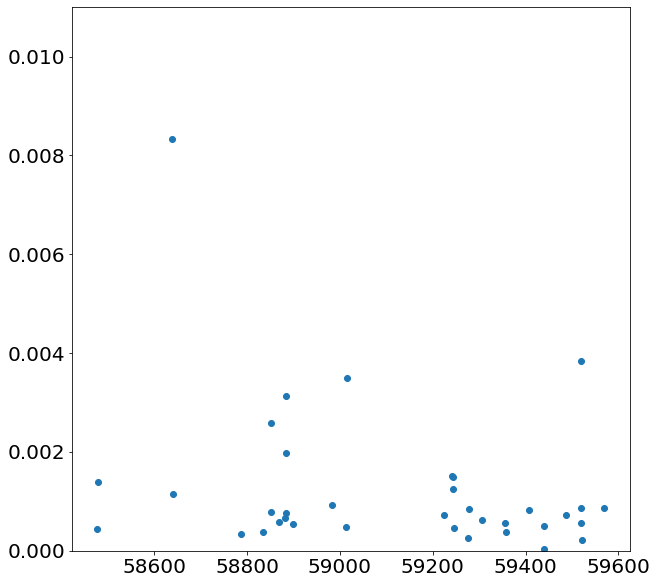

In [26]:
plt.scatter(R3_df_pol['TOA(400MHz)'], R3_df_pol['Scattering(s)'])
plt.ylim(0,0.011)
plt.show()

In [67]:
import gc
gc.collect()

266

In [18]:
basepath = '/data/user-data/ksand/R3/fitburst_run/'
event = '203935225'
pm_files = []
result_files = []
input_files = []
if event in entries:
    if (event != '.ipynb_checkpoints'):        
        path_to_event = os.path.join(basepath, event)
        trials = np.array(os.listdir(path_to_event))


        for trial in trials:
            if (trial != '.ipynb_checkpoints'):
                path_to_file = os.path.join(path_to_event, trial)
                #print(path_to_file)
                np.array(pm_files.append(glob.glob(path_to_file + '/pm*.npz')))
                #print(pm_files)
                np.array(result_files.append(glob.glob(path_to_file + '/result*.npz')))
                np.array(input_files.append(glob.glob(path_to_file + '/R3*.npz')))

print(input_files)

[['/data/user-data/ksand/R3/fitburst_run/203935225/Trial1_20220408/R3_203935225_dsamp_8.npz'], ['/data/user-data/ksand/R3/fitburst_run/203935225/Trial2_20220408/R3_203935225_dsamp_32.npz']]


0.0
(1024, 3847)


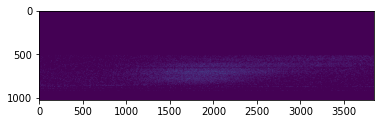

0


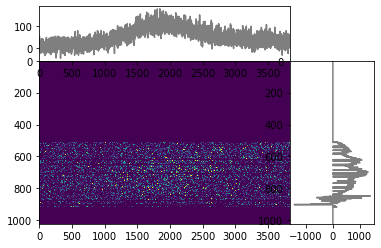

In [39]:
import matplotlib.gridspec as gridspec

data_input = np.load(input_file[0], allow_pickle = True)
data_npy = data_input["data_full"]
print(data_npy[200][200])
print(data_npy.shape)

plt.imshow(data_npy, vmin = 0, vmax = 5)
plt.show()

outer_grid = gridspec.GridSpec(1, 1, wspace=0, hspace=0.25)
for i, outer in enumerate(outer_grid):
    print(i)
    outer = outer

gs = gridspec.GridSpecFromSubplotSpec(2, 2, width_ratios=[3, 1],height_ratios=[1, 3],hspace=0.0, wspace=0.0, subplot_spec = outer)
data_im = plt.subplot(gs[2])
data_ts = plt.subplot(gs[0], sharex=data_im)
data_spec = plt.subplot(gs[3], sharey=data_im)
ts = np.nansum(data_npy, axis=0)
spec = np.nansum(data_npy, axis=1)



data_im.imshow(data_npy, aspect="auto", interpolation="nearest", vmin = 0, vmax =5)
# plot time-series
data_ts.plot(np.arange(0, len(ts)), ts, color="tab:gray",
             drawstyle="steps-post")

#data_ts.plot(plot_time, np.append(ts, ts[-1]), color=eventid_color,
#             drawstyle="steps-post")

# plot spectrum
data_spec.plot(spec, np.arange(0, len(spec)), color="tab:gray")
plt.show()
    

In [13]:
outer_grid = gridspec.GridSpec(1, 1, wspace=0, hspace=0.25)
for i, outer in enumerate(outer_grid):
    print(i)
    outer = outer

0
GridSpec(1, 1)[0:1, 0:1]


In [40]:
DMs = np.array(DMs)
downsamps = np.array(downsamps)
#DMs[0] = np.round(DMs[0],3)
print(event_ids[58])
print(len(event_ids))
print(DMs[0])
print(downsamps[0])

180667327
127
348.7988
256


In [43]:
import os 
import glob
basepath = '/data/user-data/ksand/R3/sims/tres_32micro_100sims/'
entries = os.listdir(basepath)
summary = []
summary.append(glob.glob(basepath+'*.png'))
x = summary[0][0]
y = x.split('/')[7]
sc = y.split('_')[0]
w = y.split('_')[1]
res = y.split('_')[2]
print(y, res, sc, w)

100micro_3000micro_32micro_simulation48.npz_summary.png 32micro 100micro 3000micro


In [44]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import gc
# from fpdf import FPDF
# pdf = FPDF()

for i in range(len(summary[0])):
    # Open an Image
    
    x = summary[0][i]
    y = x.split('/')[7]
    sc = y.split('_')[0]
    w = y.split('_')[1]
    res = y.split('_')[2]
#     try:
#         res = int((0.1 / int(y.split('_')[0]))*1e6)
#     except:
#         print("can't compute")
    print(res)
    
    img = Image.open(summary[0][i])

    # Call draw Method to add 2D graphics in an image
    I1 = ImageDraw.Draw(img)

    #myFont = ImageFont.truetype('FreeMono.ttf', 65)
#     DMs[i] = np.round(DMs[i],4)

    # Add Text to an image
    I1.text((25, 36), "scattering="+sc, fill=(255, 0, 0))
    I1.text((25, 56), "width="+w, fill=(255, 0, 0))
    I1.text((25, 76), "res="+str(res)+"micro", fill=(255, 0, 0))

    # Display edited image
    #img.show()
    
    output_name = "Modified_Summary_"+str(sc)+"_"+str(w)+"_"+str(res)+".png"
    #output_name = "Modified_Summary_"+str(res)+"micro.png"
    img.save("/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/"+output_name)
    print("/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/{}".format(output_name))
    #pdf.add_page()
    #pdf.image("/data/user-data/ksand/R3/R3_plots/Fitburst_run/"+output_name)
    gc.collect()
#pdf.output("R3_Fitburst_run.pdf", "F")

32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_

/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/

/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/

/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/

/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/Modified_Summary_100micro_3000micro_32micro.png
32micro
/data/user-data/ksand/R3/sims/tres_32micro_100sims/modified_32micro_100sims/

In [7]:
import numpy as np
result_file = '/data/user-data/ksand/R117/result_New_repeat_245936178_dsamp_64.npz'
data_result = np.load(result_file, allow_pickle = True)
x = data_result['arr_0'][0]
print(x)

{'dm': [-0.008126636678391152], 'scattering_timescale': [0.00042196256780838355], 'amplitude': array([-4.44760789, -3.33967599, -3.47341577, -3.42224512, -2.96527418,
       -3.48204937, -3.48981281]), 'arrival_time': array([0.01900805, 0.02425446, 0.03247956, 0.03829161, 0.04510324,
       0.0531328 , 0.05830748]), 'burst_width': array([0.00088241, 0.00124756, 0.0005593 , 0.00136991, 0.00413861,
       0.00105409, 0.00132537]), 'spectral_index': array([-27.40799877, -14.12530071,  13.46625109,  15.56174915,
        -2.14433086, -14.58874119, -16.82845005]), 'spectral_running': array([-60.50594456, -36.80954749, -33.66266467, -26.78541448,
        -3.51540262, -47.83231148, -57.46087609])}
